In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('../datasets/jruby-1.1.csv')

df.head()

,File,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,...,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE,HeuBug,HeuBugCount,RealBug,RealBugCount
0,maven/jruby-rake-plugin/src/main/java/org/jrub...,1,9,234,6,0,1,0,26,2,...,1.0,1.0,0,1,1,0,False,0,False,0
1,maven/jruby-rake-plugin/src/main/java/org/jrub...,0,7,16,2,0,1,0,2,2,...,1.0,0.0,0,1,0,0,False,0,False,0
2,maven/jruby-rake-plugin/src/main/java/org/jrub...,0,3,18,1,0,1,0,1,1,...,1.0,0.0,0,1,0,0,False,0,False,0
3,maven/jruby-rake-plugin/src/main/java/org/jrub...,0,5,20,2,0,1,0,3,2,...,1.0,0.0,0,1,0,0,False,0,False,0
4,maven/jruby-rake-plugin/src/main/java/org/jrub...,0,3,23,1,0,1,0,2,1,...,1.0,0.0,0,1,0,0,False,0,False,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   File                       731 non-null    object 
 1   CountDeclMethodPrivate     731 non-null    int64  
 2   AvgLineCode                731 non-null    int64  
 3   CountLine                  731 non-null    int64  
 4   MaxCyclomatic              731 non-null    int64  
 5   CountDeclMethodDefault     731 non-null    int64  
 6   AvgEssential               731 non-null    int64  
 7   CountDeclClassVariable     731 non-null    int64  
 8   SumCyclomaticStrict        731 non-null    int64  
 9   AvgCyclomatic              731 non-null    int64  
 10  AvgLine                    731 non-null    int64  
 11  CountDeclClassMethod       731 non-null    int64  
 12  AvgLineComment             731 non-null    int64  
 13  AvgCyclomaticModified      731 non-null    int64  

In [3]:
df = df.drop(columns=['HeuBug', 'HeuBugCount', 'RealBugCount'])

In [4]:
df.shape

(731, 67)

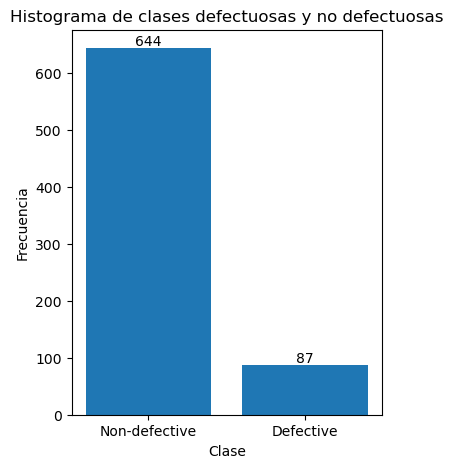

In [5]:
import matplotlib.pyplot as plt
#Defective and Non-defective Class histogram

# Count the occurrences of each class
class_counts = df['RealBug'].value_counts()

# Plot the histogram with increased height
plt.figure(figsize=(4, 5))
bars = plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Histograma de clases defectuosas y no defectuosas')
plt.xticks([0, 1], ['Non-defective', 'Defective'])

# show more numbers in frequency (y axis)
plt.gca().set_yticks(range(0, class_counts.max() + 50, 100))

# Add value labels on top of bars
plt.bar_label(bars, labels=[f'{val}' for val in class_counts.values])

# show the grid
# plt.grid(axis='y')
plt.show()


In [6]:
class_counts

RealBug
False    644
True      87
Name: count, dtype: int64

<Axes: xlabel='RealBug', ylabel='CountLineCode'>

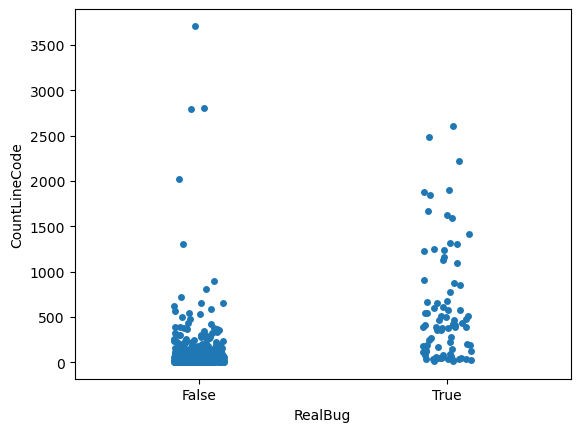

In [7]:
# Dispersion plot of class Defective
import seaborn as sns

sns.stripplot(x='RealBug', y='CountLineCode', data=df, jitter=True)

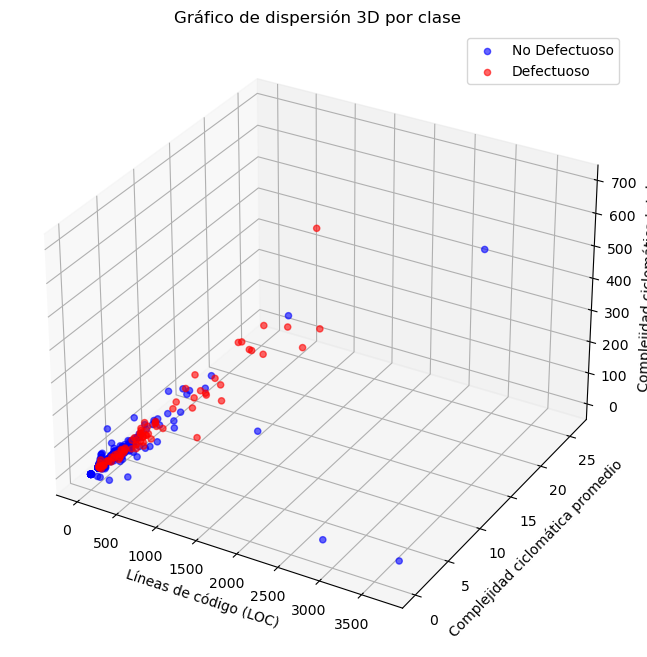

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Separar por clase
defective = df[df['RealBug'] == 1]
non_defective = df[df['RealBug'] == 0]

# Graficar cada clase con diferente color
ax.scatter(non_defective['CountLineCode'], 
           non_defective['AvgCyclomatic'], 
           non_defective['SumCyclomatic'],
           c='blue', label='No Defectuoso', alpha=0.6)

ax.scatter(defective['CountLineCode'], 
           defective['AvgCyclomatic'], 
           defective['SumCyclomatic'],
           c='red', label='Defectuoso', alpha=0.6)

ax.set_xlabel('Líneas de código (LOC)')
ax.set_ylabel('Complejidad ciclomática promedio')
ax.set_zlabel('Complejidad ciclomática total')
ax.set_title('Gráfico de dispersión 3D por clase')
ax.legend()

plt.show()

## Preprocesamiento

- isNull / Missing values
- Duplicados
- Outlaiers ( no porque el metodo HCBOU de balanceo no lo recomienda)
- Particion Train/Test
- Transformación de los datos - Normalización/Estandarización (StandarScaler)
- Balanceo de clases - HCBOU
- Seleccion de caracteristicas (arbol de decision - CABOOST) 
- Reduccion de Dimensionalidad (PCA)

### Missing Values

In [9]:
df.isnull().sum()

File                      0
CountDeclMethodPrivate    0
AvgLineCode               0
CountLine                 0
MaxCyclomatic             0
                         ..
MINOR_COMMIT              0
MINOR_LINE                0
MAJOR_COMMIT              0
MAJOR_LINE                0
RealBug                   0
Length: 67, dtype: int64

### Duplicated

In [10]:
df.duplicated().sum()

0

### Split Train/Test 80/20

In [11]:
# split train and test
from sklearn.model_selection import train_test_split

X = df.drop(columns=['RealBug'])
y = df['RealBug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
print(X_train.shape)
print(X_test.shape)

(584, 66)
(147, 66)


### Normalización

In [13]:
from sklearn.preprocessing import StandardScaler

X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
X_train_numeric_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns=X_train_numeric.columns)

In [14]:
X_train_numeric.describe()

,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,AvgLine,...,ADEV,DDEV,Added_lines,Del_lines,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,1.621575,5.686644,218.214041,6.950342,0.582192,1.119863,2.089041,36.511986,1.654110,7.065068,...,4.426370,1.385274,92.933219,55.239726,0.786637,0.452048,0.080479,2.148973,1.304795,1.183219
std,6.646085,7.297836,440.067479,26.565998,3.267926,0.619314,9.824478,88.500564,1.696596,8.835404,...,10.150399,1.678393,283.331299,212.119179,0.230613,0.415181,0.428843,1.316239,1.488519,1.663551
min,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.261364,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.000000,45.750000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.564699,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,3.000000,83.500000,2.000000,0.000000,1.000000,0.000000,7.000000,1.000000,5.000000,...,1.000000,1.000000,3.000000,1.000000,0.899000,0.500000,0.000000,2.000000,1.000000,1.000000
75%,0.000000,7.000000,179.250000,5.000000,0.000000,1.000000,1.000000,27.000000,2.000000,9.000000,...,4.000000,2.000000,66.000000,18.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000
max,92.000000,124.000000,3461.000000,410.000000,50.000000,6.000000,133.000000,780.000000,26.000000,150.000000,...,99.000000,8.000000,3094.000000,2510.000000,1.000000,1.000000,3.000000,7.000000,7.000000,8.000000


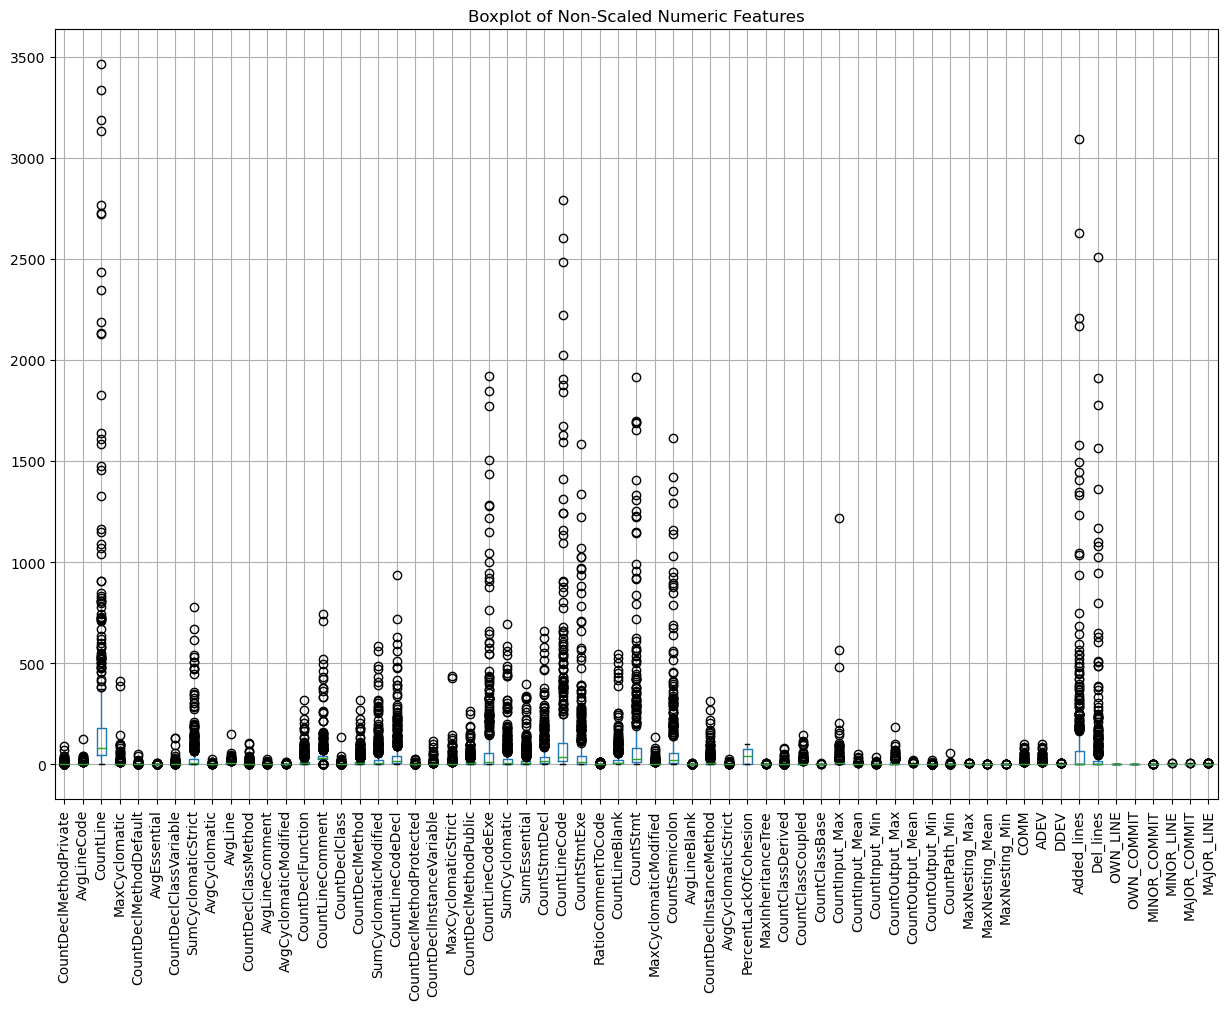

In [15]:
plt.figure(figsize=(15, 10))
X_train_numeric.drop(columns=['CountPath_Max', 'CountPath_Mean']).boxplot()
plt.title('Boxplot of Non-Scaled Numeric Features')
plt.xticks(rotation=90)
plt.show()

In [16]:
X_train_numeric_scaled.describe()

,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,AvgLine,...,ADEV,DDEV,Added_lines,Del_lines,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE
count,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,...,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02
mean,-3.041707e-18,1.520853e-18,-3.650048e-17,1.216683e-17,-2.433366e-17,7.604267e-17,-1.825024e-17,-3.345878e-17,-1.368768e-17,9.125121e-18,...,-1.482832e-17,7.300097e-17,-4.258390e-17,-1.672939e-17,4.653812e-16,-1.460019e-16,-1.520853e-17,-1.399185e-16,6.083414e-18,3.497963e-17
std,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,...,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00
min,-2.441987e-01,-7.798913e-01,-4.871927e-01,-2.618498e-01,-1.783060e-01,-1.809781e+00,-2.128186e-01,-4.129159e-01,-9.757934e-01,-8.003171e-01,...,-4.364523e-01,-8.260647e-01,-3.282831e-01,-2.606416e-01,-2.279678e+00,-1.089731e+00,-1.878273e-01,-8.736690e-01,-8.773238e-01,-7.118708e-01
25%,-2.441987e-01,-3.684581e-01,-3.922396e-01,-2.241754e-01,-1.783060e-01,-1.937075e-01,-2.128186e-01,-3.789887e-01,-3.858728e-01,-4.604830e-01,...,-4.364523e-01,-8.260647e-01,-3.282831e-01,-2.606416e-01,-9.632075e-01,-1.089731e+00,-1.878273e-01,-8.736690e-01,-8.773238e-01,-7.118708e-01
50%,-2.441987e-01,-3.684581e-01,-3.063838e-01,-1.865010e-01,-1.783060e-01,-1.937075e-01,-2.128186e-01,-3.337525e-01,-3.858728e-01,-2.339269e-01,...,-3.378495e-01,-2.297461e-01,-3.176857e-01,-2.559232e-01,4.876527e-01,1.155946e-01,-1.878273e-01,-1.132775e-01,-2.049391e-01,-1.102318e-01
75%,-2.441987e-01,1.801194e-01,-8.861696e-02,-7.347793e-02,-1.783060e-01,-1.937075e-01,-1.109448e-01,-1.075715e-01,2.040479e-01,2.191852e-01,...,-4.204124e-02,3.665726e-01,-9.514059e-02,-1.757109e-01,9.259909e-01,1.320920e+00,-1.878273e-01,6.471140e-01,4.674455e-01,4.914072e-01
max,1.361040e+01,1.622601e+01,7.375155e+00,1.518464e+01,1.513504e+01,7.886662e+00,1.333640e+01,8.408143e+00,1.436214e+01,1.619139e+01,...,9.325221e+00,3.944485e+00,1.060116e+01,1.158247e+01,9.259909e-01,1.320920e+00,6.813734e+00,3.688680e+00,3.829369e+00,4.101241e+00


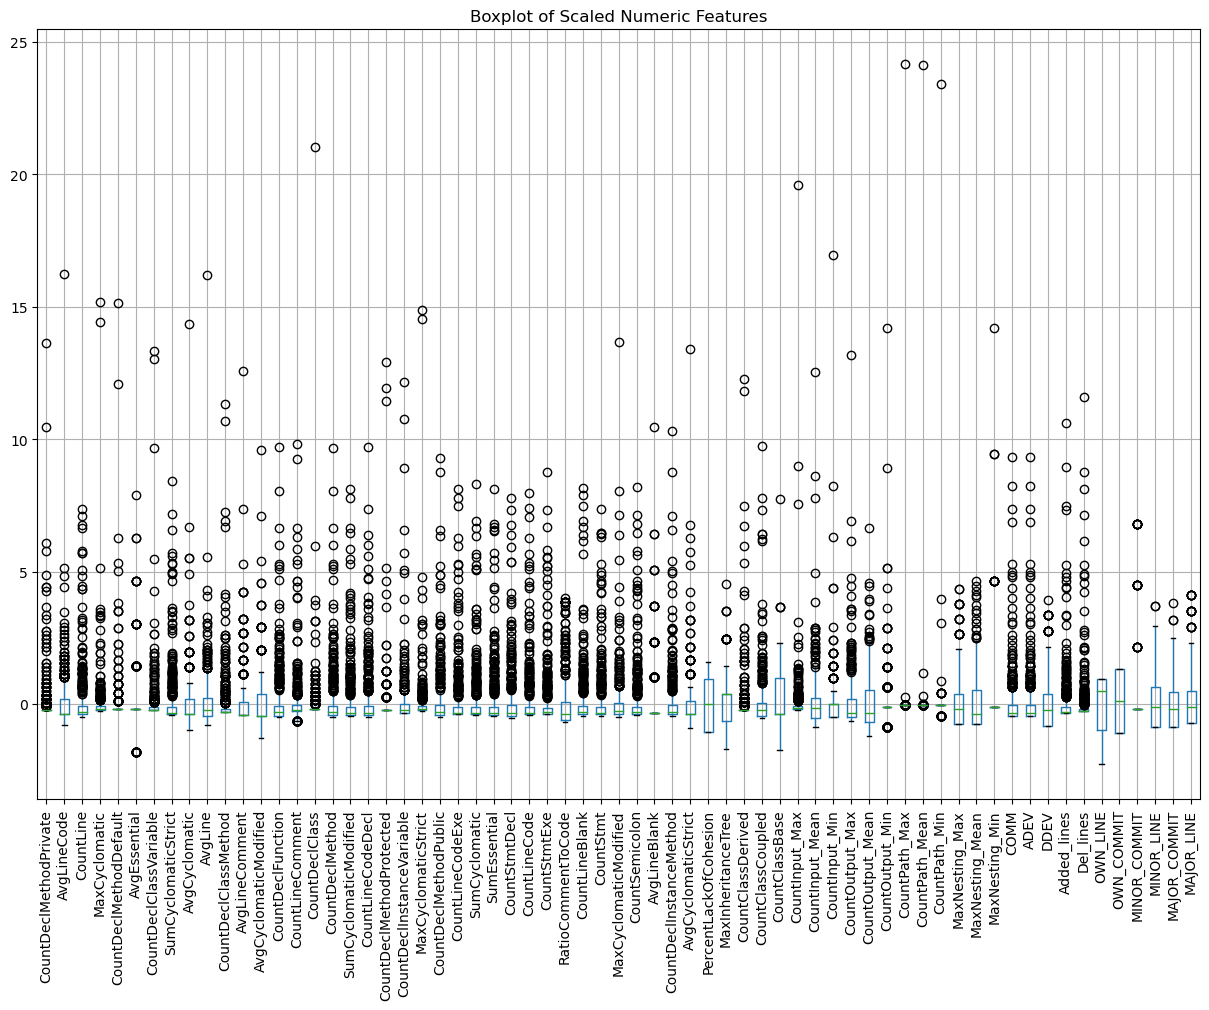

In [17]:
plt.figure(figsize=(15, 10))
X_train_numeric_scaled.boxplot()
plt.title('Boxplot of Scaled Numeric Features')
plt.xticks(rotation=90)
plt.show()